In [1]:
import time
start = time.time()

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.experimental import enable_iterative_imputer  # ✅ FIXED HERE
from sklearn.impute import IterativeImputer 
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
import os

print(f"Working director is", os.getcwd())

Working director is /Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/notebooks


In [3]:
df_train = pd.read_csv("/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/data/raw/train.csv")
df_train.head()
df_train.info()
df_train.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Data Analysis
1. Missing Values
2. Explore about the numerical variables
4. explore the categorical variables
5. finding relationship between features

In [4]:
df_train.isna().sum()
missing_na_features = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
    'Name']

for col in missing_na_features:
	df_train[f'{col}_missing'] = df_train[col].isna().astype(int)
#we are using a for loop to create a new column for all the missing indicator columns 
df_train['Age_missing'].head()

0    0
1    0
2    0
3    0
4    0
Name: Age_missing, dtype: int64

In [5]:
df_train.drop(['Name'], axis = 1, inplace = True)

*Convert Cabin into three*

In [6]:
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split('/', expand=True)
df_train['Num'] = pd.to_numeric(df_train['Num'], errors='coerce')
df_train.head()

cabin = [
    'Deck', 
    'Num',
    'Side'
]

for col in cabin:
    df_train[f'{col}_missing'] = df_train[col].isna().astype(int)
    
df_train.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_missing', 'CryoSleep_missing',
       'Cabin_missing', 'Destination_missing', 'Age_missing', 'VIP_missing',
       'RoomService_missing', 'FoodCourt_missing', 'ShoppingMall_missing',
       'Spa_missing', 'VRDeck_missing', 'Name_missing', 'Deck', 'Num', 'Side',
       'Deck_missing', 'Num_missing', 'Side_missing'],
      dtype='object')

In [7]:
dis_deck = df_train['Deck_missing'].value_counts(dropna = False)
dis_deck

Deck_missing
0    8494
1     199
Name: count, dtype: int64

In [8]:
distribution = df_train['HomePlanet'].value_counts(dropna = False)
distribution

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

In [9]:
df_train['HomePlanet'] = df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0])
df_train['HomePlanet'].value_counts(dropna = False)

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [10]:
homeplanet_dummies = pd.get_dummies(df_train['HomePlanet'], prefix = 'HomePlanet')
df_train = pd.concat([df_train, homeplanet_dummies], axis = 1)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name_missing,Deck,Num,Side,Deck_missing,Num_missing,Side_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,B,0.0,P,0,0,0,False,True,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,F,0.0,S,0,0,0,True,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0,A,0.0,S,0,0,0,False,True,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0,A,0.0,S,0,0,0,False,True,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0,F,1.0,S,0,0,0,True,False,False


In [ ]:
#Convert Boolean columns to int

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           8693 non-null   object 
 1   HomePlanet            8693 non-null   object 
 2   CryoSleep             8476 non-null   object 
 3   Cabin                 8494 non-null   object 
 4   Destination           8511 non-null   object 
 5   Age                   8514 non-null   float64
 6   VIP                   8490 non-null   object 
 7   RoomService           8512 non-null   float64
 8   FoodCourt             8510 non-null   float64
 9   ShoppingMall          8485 non-null   float64
 10  Spa                   8510 non-null   float64
 11  VRDeck                8505 non-null   float64
 12  Transported           8693 non-null   bool   
 13  HomePlanet_missing    8693 non-null   int64  
 14  CryoSleep_missing     8693 non-null   int64  
 15  Cabin_missing        

In [12]:
bool_cols = ['Transported', 'HomePlanet_Mars', 'HomePlanet_Europa', 'HomePlanet_Earth', 'Transported', 'VIP', 'CryoSleep', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22']

In [13]:
df_train.isna().sum()

PassengerId               0
HomePlanet                0
CryoSleep               217
Cabin                   199
Destination             182
Age                     179
VIP                     203
RoomService             181
FoodCourt               183
ShoppingMall            208
Spa                     183
VRDeck                  188
Transported               0
HomePlanet_missing        0
CryoSleep_missing         0
Cabin_missing             0
Destination_missing       0
Age_missing               0
VIP_missing               0
RoomService_missing       0
FoodCourt_missing         0
ShoppingMall_missing      0
Spa_missing               0
VRDeck_missing            0
Name_missing              0
Deck                    199
Num                     199
Side                    199
Deck_missing              0
Num_missing               0
Side_missing              0
HomePlanet_Earth          0
HomePlanet_Europa         0
HomePlanet_Mars           0
dtype: int64

In [14]:
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0])
df_train['Destination'] = df_train['Destination'].fillna(df_train['Destination'].mode()[0])

In [15]:
df_train.isna().sum()

PassengerId               0
HomePlanet                0
CryoSleep                 0
Cabin                   199
Destination               0
Age                     179
VIP                     203
RoomService             181
FoodCourt               183
ShoppingMall            208
Spa                     183
VRDeck                  188
Transported               0
HomePlanet_missing        0
CryoSleep_missing         0
Cabin_missing             0
Destination_missing       0
Age_missing               0
VIP_missing               0
RoomService_missing       0
FoodCourt_missing         0
ShoppingMall_missing      0
Spa_missing               0
VRDeck_missing            0
Name_missing              0
Deck                    199
Num                     199
Side                    199
Deck_missing              0
Num_missing               0
Side_missing              0
HomePlanet_Earth          0
HomePlanet_Europa         0
HomePlanet_Mars           0
dtype: int64

In [16]:

destination_dummies = pd.get_dummies(df_train['Destination'], prefix = 'Destination')
df_train = pd.concat([df_train, destination_dummies], axis = 1)
df_train.head()
df_train['Destination'].value_counts(dropna = False)

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [17]:
df_train.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_missing', 'CryoSleep_missing',
       'Cabin_missing', 'Destination_missing', 'Age_missing', 'VIP_missing',
       'RoomService_missing', 'FoodCourt_missing', 'ShoppingMall_missing',
       'Spa_missing', 'VRDeck_missing', 'Name_missing', 'Deck', 'Num', 'Side',
       'Deck_missing', 'Num_missing', 'Side_missing', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [18]:
features_to_impute = ['FoodCourt', 'ShoppingMall', 'RoomService', 'Spa', 'VRDeck']
imp = IterativeImputer(estimator = BayesianRidge(), max_iter = 10, random_state = 0)
df_train[features_to_impute] = imp.fit_transform(df_train[features_to_impute])
print(df_train.isna().sum())

PassengerId                    0
HomePlanet                     0
CryoSleep                      0
Cabin                        199
Destination                    0
Age                          179
VIP                          203
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Transported                    0
HomePlanet_missing             0
CryoSleep_missing              0
Cabin_missing                  0
Destination_missing            0
Age_missing                    0
VIP_missing                    0
RoomService_missing            0
FoodCourt_missing              0
ShoppingMall_missing           0
Spa_missing                    0
VRDeck_missing                 0
Name_missing                   0
Deck                         199
Num                          199
Side                         199
Deck_missing                   0
Num_missing                    0
Side_missi

In [19]:
df_train['Side'].value_counts(dropna = False)

Side
S      4288
P      4206
NaN     199
Name: count, dtype: int64

In [20]:
df_train['Side'] = df_train['Side'].fillna(df_train['Side'].mode()[0])
df_train['Num'] = df_train['Num'].fillna(df_train['Num'].mode()[0])
df_train['Deck'] = df_train['Deck'].fillna(df_train['Deck'].mode()[0])
imp = IterativeImputer(random_state=42)
df_train['Age'] = imp.fit_transform(df_train[['Age']])


In [21]:
df_train.drop(['Cabin'], axis = 1, inplace = True)

In [22]:
df_train.isna().sum()

PassengerId                    0
HomePlanet                     0
CryoSleep                      0
Destination                    0
Age                            0
VIP                          203
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Transported                    0
HomePlanet_missing             0
CryoSleep_missing              0
Cabin_missing                  0
Destination_missing            0
Age_missing                    0
VIP_missing                    0
RoomService_missing            0
FoodCourt_missing              0
ShoppingMall_missing           0
Spa_missing                    0
VRDeck_missing                 0
Name_missing                   0
Deck                           0
Num                            0
Side                           0
Deck_missing                   0
Num_missing                    0
Side_missing                   0
HomePlanet

In [23]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Side,Deck_missing,Num_missing,Side_missing,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,P,0,0,0,False,True,False,False,False,True
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,S,0,0,0,True,False,False,False,False,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,S,0,0,0,False,True,False,False,False,True
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,S,0,0,0,False,True,False,False,False,True
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,S,0,0,0,True,False,False,False,False,True


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   HomePlanet                 8693 non-null   object 
 2   CryoSleep                  8693 non-null   bool   
 3   Destination                8693 non-null   object 
 4   Age                        8693 non-null   float64
 5   VIP                        8490 non-null   object 
 6   RoomService                8693 non-null   float64
 7   FoodCourt                  8693 non-null   float64
 8   ShoppingMall               8693 non-null   float64
 9   Spa                        8693 non-null   float64
 10  VRDeck                     8693 non-null   float64
 11  Transported                8693 non-null   bool   
 12  HomePlanet_missing         8693 non-null   int64  
 13  CryoSleep_missing          8693 non-null   int64

In [26]:
df_train['VIP'] = df_train['VIP'].fillna(df_train['VIP'].mode()[0])

In [27]:
df_train['VIP'].value_counts(dropna=False)

VIP
False    8494
True      199
Name: count, dtype: int64

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   HomePlanet                 8693 non-null   object 
 2   CryoSleep                  8693 non-null   bool   
 3   Destination                8693 non-null   object 
 4   Age                        8693 non-null   float64
 5   VIP                        8693 non-null   bool   
 6   RoomService                8693 non-null   float64
 7   FoodCourt                  8693 non-null   float64
 8   ShoppingMall               8693 non-null   float64
 9   Spa                        8693 non-null   float64
 10  VRDeck                     8693 non-null   float64
 11  Transported                8693 non-null   bool   
 12  HomePlanet_missing         8693 non-null   int64  
 13  CryoSleep_missing          8693 non-null   int64

In [34]:
df_train[['PassengerGroupID', 'PassengerMemberID']] = df_train['PassengerId'].str.split('_', expand=True)

In [38]:
df_train.keys()
df_train.drop(['PassengerId'], axis = 1, inplace = True)

KeyError: "['PassengerId'] not found in axis"

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 8693 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Destination                8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   bool   
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Transported                8693 non-null   bool   
 11  HomePlanet_missing         8693 non-null   int64  
 12  CryoSleep_missing          8693 non-null   int64  
 13  Cabin_missing              8693 non-null   int64

In [46]:
side_dummies = pd.get_dummies(df_train['Side'], prefix = 'Side')
df_train = pd.concat([df_train, side_dummies], axis = 1)
df_train.head()
df_train['Side'].value_counts(dropna = False)

Side
S    4487
P    4206
Name: count, dtype: int64

In [48]:
df_train.drop(['Side'], axis = 1, inplace = True)

In [52]:
df_train['Deck'].value_counts(dropna = False)
deck_dummies = pd.get_dummies(df_train['Deck'], prefix = 'Deck')
df_train = pd.concat([df_train, deck_dummies], axis = 1)
df_train.head()
df_train.drop(['Deck'], axis = 1, inplace = True)

In [53]:
df_train['HomePlanet'].head()

0    Europa
1     Earth
2    Europa
3    Europa
4     Earth
Name: HomePlanet, dtype: object

In [55]:
df_train.drop(['HomePlanet'], axis = 1, inplace = True)

In [59]:
df_train.drop(['Destination'], axis =  1, inplace = True)

In [64]:
df_train.drop(['PassengerMemberID'], axis = 1, inplace = True)
df_train.drop(['PassengerGroupID'], axis = 1, inplace = True)

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_missing         8693 non-null   int64  
 10  CryoSleep_missing          8693 non-null   int64  
 11  Cabin_missing              8693 non-null   int64  
 12  Destination_missing        8693 non-null   int64  
 13  Age_missing                8693 non-null   int64

In [69]:
# Detect duplicate column names
df_train.columns[df_train.columns.duplicated()]
df_train = df_train.loc[:, ~df_train.columns.duplicated()]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_missing         8693 non-null   int64  
 10  CryoSleep_missing          8693 non-null   int64  
 11  Cabin_missing              8693 non-null   int64  
 12  Destination_missing        8693 non-null   int64  
 13  Age_missing                8693 non-null   int64

In [70]:
# Convert all boolean columns to 0/1 integers
bool_cols = df_train.select_dtypes(include='bool').columns
df_train[bool_cols] = df_train[bool_cols].astype(int)


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
float_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']
df_train[float_cols] = scaler.fit_transform(df_train[float_cols])

In [73]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [76]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("ClassificationReport:\n", report)

Accuracy: 0.79
ClassificationReport:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1289
           1       0.81      0.77      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [81]:
from xgboost import XGBClassifier
print("\n=== XGBoost Model with Class Weight Tuning ===")
    
n_pos = np.sum(y == 1)
n_neg = np.sum(y == 0)
scale_pos_weight = n_neg / n_pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")
    
    
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
    
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)
    
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
    
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



=== XGBoost Model with Class Weight Tuning ===
scale_pos_weight: 0.99
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1289
           1       0.79      0.80      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

Accuracy: 0.79


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtr = DecisionTreeClassifier(random_state = 42)

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predict on test set
y_pred = dtc.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1289
           1       0.74      0.76      0.75      1319

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608


Confusion Matrix:
[[ 927  362]
 [ 310 1009]]


Best RF Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best RF Score: 0.8080775844624678


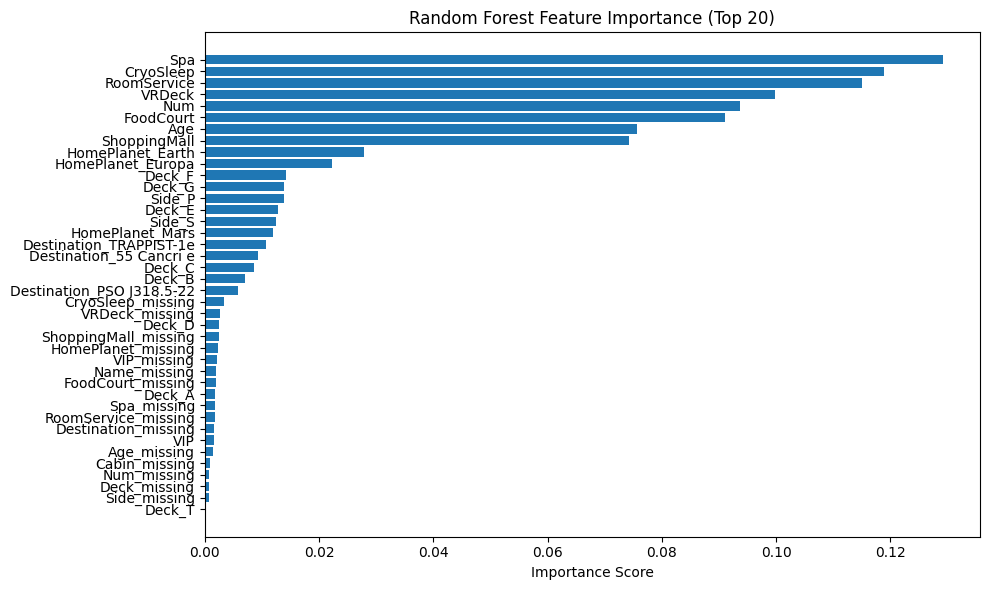

In [200]:

##For Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)

import matplotlib.pyplot as plt
import pandas as pd

best_rf = grid_rf.best_estimator_
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Step 3: Build importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 4: Plot (optional: top N)
top_n = 50
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importance (Top 20)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [201]:
top_features = importance_df['Feature'].head(20)
X_top = X_train[top_features]

# Retrain your model on X_top instead of full X
rf.fit(X_top, y_train)
print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)



Best RF Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best RF Score: 0.8080775844624678


In [202]:
## For XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss'),
    param_grid, cv=3, scoring='f1', n_jobs=-1
)
grid_xgb.fit(X_top, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB Score:", grid_xgb.best_score_)


/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:08:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:08:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:08:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abishekbhuvanaratnam/Documents/first-ds-proje

Best XGB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGB Score: 0.8138132965697422


In [99]:
#Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1289
           1       0.77      0.81      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [208]:
##Ensemble
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb_model),
        ('lr', lr)
    ],
    voting='soft'
)

voting.fit(X_top, y_train)
y_pred_voting = voting.predict(X_top)
accuracy = accuracy_score(y_train, y_pred_voting)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9576


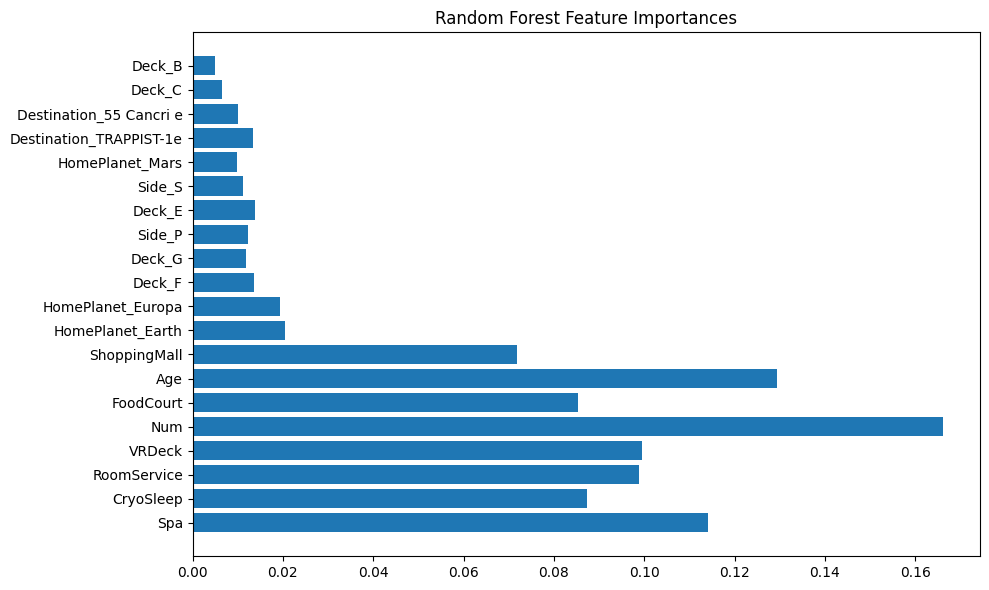

In [209]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X_top.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


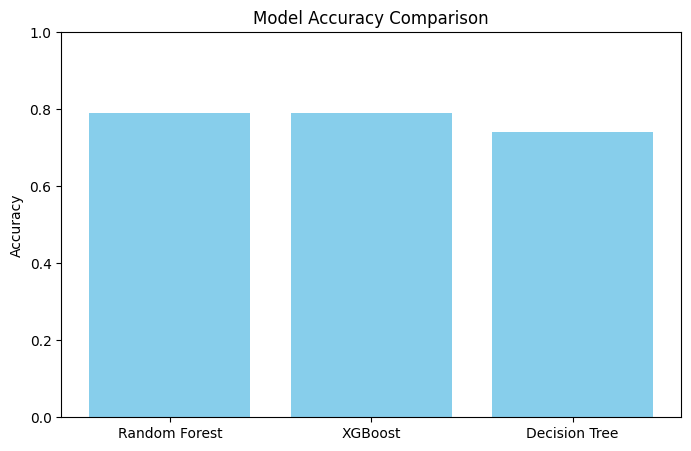

In [210]:
import matplotlib.pyplot as plt

# Example accuracy scores
model_names = ['Random Forest', 'XGBoost', 'Decision Tree']
accuracies = [0.79, 0.79, 0.74]  # Replace with your actual values

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


In [211]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [2608, 6085]

In [212]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = rf.predict_proba(X_test)[:, 1]  # Use your model here

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age_missing
- Cabin_missing
- CryoSleep_missing
- Deck_A
- Deck_D
- ...


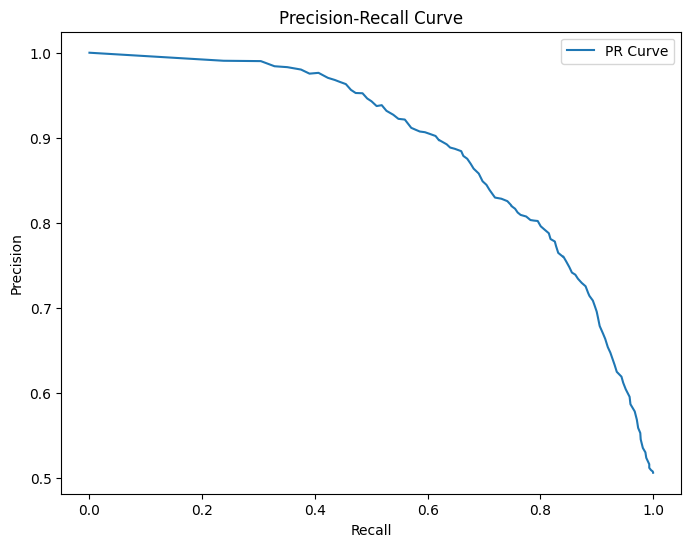

Exception ignored in: <function ResourceTracker.__del__ at 0x1022a9940>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106e79940>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

In [213]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
### TRAIN WIHT 100 PERCENT OF THE DATA

In [214]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   HomePlanet_missing         8693 non-null   int64  
 10  CryoSleep_missing          8693 non-null   int64  
 11  Cabin_missing              8693 non-null   int64  
 12  Destination_missing        8693 non-null   int64  
 13  Age_missing                8693 non-null   int64

In [178]:
df_train.drop(['Deck'], axis = 1, inplace = True)

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

top_n = 15
top_features = importance_df['Feature'].head(top_n).tolist()

X_top = df_train[top_features]
y = df_train['Transported']
rf = RandomForestClassifier(random_state = 42)

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold CV

print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validated Accuracy: 0.7896 ± 0.0211


In [217]:
from xgboost import XGBClassifier
print("\n=== XGBoost Model with Class Weight Tuning ===")
    
n_pos = np.sum(y == 1)
n_neg = np.sum(y == 0)
scale_pos_weight = n_neg / n_pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")
    
    
xgb_model = XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    eval_metric = 'logloss',
    use_label_encoder = False
)

cv_scores = cross_val_score(xgb_model, X_top, y, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Vlaidated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


=== XGBoost Model with Class Weight Tuning ===
scale_pos_weight: 0.99
XGBoost Cross-Vlaidated Accuracy: 0.7681 ± 0.0302
Accuracy: 0.74


In [218]:
dtr = DecisionTreeClassifier(random_state = 42)

In [220]:
dtc = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(dtc, X_top, y, cv=5, scoring='accuracy')

print(f"Decision Tree Cross-Validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
dtc.fit(X_top, y)  # Train on ALL of df_train (no hold-out)


Decision Tree Cross-Validated Accuracy: 0.7154 ± 0.0331


DecisionTreeClassifier(random_state=42)

In [227]:

##For Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_top, y)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)


Best RF Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Score: 0.7771112878163482


In [222]:
## For XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss'),
    param_grid, cv=3, scoring='f1', n_jobs=-1
)
grid_xgb.fit(X_top, y)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB Score:", grid_xgb.best_score_)


/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abishekbhuvanaratnam/Documents/first-ds-proje

Best XGB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best XGB Score: 0.7766327912807448


In [223]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
cv_scores = cross_val_score(lr, X_top, y, cv = 5, scoring='accuracy')
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1289
           1       0.77      0.81      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [228]:
##Ensemble
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb_model),
        ('lr', lr)
    ],
    voting='soft'
)

voting.fit(X, y)
cv_scores = cross_val_score(voting, X_top, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validated Accuracy: 0.7862 ± 0.0303


In [229]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_top, y)

best_rf = grid_rf.best_estimator_
print("Best rf Score:", grid_rf.best_score_)



Best rf Score: 0.783735766889254


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
### TESTING 

In [109]:
df_test = pd.read_csv("/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/data/raw/test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [110]:
df_test.isna().sum()


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [111]:
missing_na_features = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
    'Name']

for col in missing_na_features:
	df_test[f'{col}_missing'] = df_test[col].isna().astype(int)
#we are using a for loop to create a new column for all the missing indicator columns 
df_test['Age_missing'].head()

0    0
1    0
2    0
3    0
4    0
Name: Age_missing, dtype: int64

In [113]:
df_test.drop(['Name'], axis = 1, inplace = True)

In [114]:
df_test[['Deck', 'Num', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df_test['Num'] = pd.to_numeric(df_test['Num'], errors='coerce')
df_test.head()

cabin = [
    'Deck', 
    'Num',
    'Side'
]

for col in cabin:
    df_test[f'{col}_missing'] = df_test[col].isna().astype(int)
    
df_test.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_missing', 'CryoSleep_missing', 'Cabin_missing',
       'Destination_missing', 'Age_missing', 'VIP_missing',
       'RoomService_missing', 'FoodCourt_missing', 'ShoppingMall_missing',
       'Spa_missing', 'VRDeck_missing', 'Name_missing', 'Deck', 'Num', 'Side',
       'Deck_missing', 'Num_missing', 'Side_missing'],
      dtype='object')

In [148]:
dis_deck = df_test['Deck_missing'].value_counts(dropna = False)
dis_deck

Deck_missing
0    4177
1     100
Name: count, dtype: int64

In [150]:
df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0])
df_test['HomePlanet'].value_counts(dropna = False)

KeyError: 'HomePlanet'

In [ ]:
homeplanet_dummies = pd.get_dummies(df_test['HomePlanet'], prefix = 'HomePlanet')
df_test = pd.concat([df_test, homeplanet_dummies], axis = 1)
df_test.head()

In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   bool   
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   bool   
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   HomePlanet_missing         4277 non-null   int64  
 9   CryoSleep_missing          4277 non-null   int64  
 10  Cabin_missing              4277 non-null   int64  
 11  Destination_missing        4277 non-null   int64  
 12  Age_missing                4277 non-null   int64  
 13  VIP_missing                4277 non-null   int64

In [122]:
df_test.isna().sum()

PassengerId               0
HomePlanet                0
CryoSleep                93
Cabin                   100
Destination              92
Age                      91
VIP                      93
RoomService              82
FoodCourt               106
ShoppingMall             98
Spa                     101
VRDeck                   80
HomePlanet_missing        0
CryoSleep_missing         0
Cabin_missing             0
Destination_missing       0
Age_missing               0
VIP_missing               0
RoomService_missing       0
FoodCourt_missing         0
ShoppingMall_missing      0
Spa_missing               0
VRDeck_missing            0
Name_missing              0
Deck                    100
Num                     100
Side                    100
Deck_missing              0
Num_missing               0
Side_missing              0
HomePlanet_Earth          0
HomePlanet_Europa         0
HomePlanet_Mars           0
dtype: int64

In [123]:
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0])
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode()[0])

In [125]:
df_test.isna().sum()

PassengerId               0
HomePlanet                0
CryoSleep                 0
Cabin                   100
Destination               0
Age                      91
VIP                      93
RoomService              82
FoodCourt               106
ShoppingMall             98
Spa                     101
VRDeck                   80
HomePlanet_missing        0
CryoSleep_missing         0
Cabin_missing             0
Destination_missing       0
Age_missing               0
VIP_missing               0
RoomService_missing       0
FoodCourt_missing         0
ShoppingMall_missing      0
Spa_missing               0
VRDeck_missing            0
Name_missing              0
Deck                    100
Num                     100
Side                    100
Deck_missing              0
Num_missing               0
Side_missing              0
HomePlanet_Earth          0
HomePlanet_Europa         0
HomePlanet_Mars           0
dtype: int64

In [126]:

destination_dummies = pd.get_dummies(df_test['Destination'], prefix = 'Destination')
df_test = pd.concat([df_test, destination_dummies], axis = 1)
df_test.head()
df_test['Destination'].value_counts(dropna = False)

Destination
TRAPPIST-1e      3048
55 Cancri e       841
PSO J318.5-22     388
Name: count, dtype: int64

In [127]:
features_to_impute = ['FoodCourt', 'ShoppingMall', 'RoomService', 'Spa', 'VRDeck']
imp = IterativeImputer(estimator = BayesianRidge(), max_iter = 10, random_state = 0)
df_test[features_to_impute] = imp.fit_transform(df_test[features_to_impute])
print(df_test.isna().sum())

PassengerId                    0
HomePlanet                     0
CryoSleep                      0
Cabin                        100
Destination                    0
Age                           91
VIP                           93
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
HomePlanet_missing             0
CryoSleep_missing              0
Cabin_missing                  0
Destination_missing            0
Age_missing                    0
VIP_missing                    0
RoomService_missing            0
FoodCourt_missing              0
ShoppingMall_missing           0
Spa_missing                    0
VRDeck_missing                 0
Name_missing                   0
Deck                         100
Num                          100
Side                         100
Deck_missing                   0
Num_missing                    0
Side_missing                   0
HomePlanet

In [129]:
df_test['Side'].value_counts(dropna = False)

Side
S      2093
P      2084
NaN     100
Name: count, dtype: int64

In [134]:
df_test['Side'] = df_test['Side'].fillna(df_test['Side'].mode()[0])
df_test['Num'] = df_test['Num'].fillna(df_test['Num'].mode()[0])
df_test['Deck'] = df_test['Deck'].fillna(df_test['Deck'].mode()[0])
imp = IterativeImputer(random_state=42)
df_test['Age'] = imp.fit_transform(df_test[['Age']])


In [135]:
df_test.drop(['Cabin'], axis = 1, inplace = True)

KeyError: "['Cabin'] not found in axis"

In [136]:
df_test.isna().sum()

PassengerId                   0
HomePlanet                    0
CryoSleep                     0
Destination                   0
Age                           0
VIP                          93
RoomService                   0
FoodCourt                     0
ShoppingMall                  0
Spa                           0
VRDeck                        0
HomePlanet_missing            0
CryoSleep_missing             0
Cabin_missing                 0
Destination_missing           0
Age_missing                   0
VIP_missing                   0
RoomService_missing           0
FoodCourt_missing             0
ShoppingMall_missing          0
Spa_missing                   0
VRDeck_missing                0
Name_missing                  0
Deck                          0
Num                           0
Side                          0
Deck_missing                  0
Num_missing                   0
Side_missing                  0
HomePlanet_Earth              0
HomePlanet_Europa             0
HomePlan

In [138]:
df_test['VIP'] = df_test['VIP'].fillna(df_test['VIP'].mode()[0])

In [139]:
df_test['VIP'].value_counts(dropna=False)

VIP
False    4203
True       74
Name: count, dtype: int64

In [140]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                4277 non-null   object 
 1   HomePlanet                 4277 non-null   object 
 2   CryoSleep                  4277 non-null   bool   
 3   Destination                4277 non-null   object 
 4   Age                        4277 non-null   float64
 5   VIP                        4277 non-null   bool   
 6   RoomService                4277 non-null   float64
 7   FoodCourt                  4277 non-null   float64
 8   ShoppingMall               4277 non-null   float64
 9   Spa                        4277 non-null   float64
 10  VRDeck                     4277 non-null   float64
 11  HomePlanet_missing         4277 non-null   int64  
 12  CryoSleep_missing          4277 non-null   int64  
 13  Cabin_missing              4277 non-null   int64

In [141]:
df_test[['PassengerGroupID', 'PassengerMemberID']] = df_test['PassengerId'].str.split('_', expand=True)

In [142]:
df_test.keys()
df_test.drop(['PassengerId'], axis = 1, inplace = True)

In [143]:
side_dummies = pd.get_dummies(df_test['Side'], prefix = 'Side')
df_test = pd.concat([df_test, side_dummies], axis = 1)
df_test.head()
df_test['Side'].value_counts(dropna = False)

Side
S    2193
P    2084
Name: count, dtype: int64

In [144]:
df_test.drop(['Side'], axis = 1, inplace = True)

In [145]:
df_test['Deck'].value_counts(dropna = False)
deck_dummies = pd.get_dummies(df_test['Deck'], prefix = 'Deck')
df_test = pd.concat([df_test, deck_dummies], axis = 1)
df_test.head()
df_test.drop(['Deck'], axis = 1, inplace = True)

In [146]:
df_test['HomePlanet'].head()

0     Earth
1     Earth
2    Europa
3    Europa
4     Earth
Name: HomePlanet, dtype: object

In [153]:
df_test.drop(['HomePlanet'], axis = 1, inplace = True)
df_test.drop(['Destination'], axis =  1, inplace = True)
df_test.drop(['PassengerMemberID'], axis = 1, inplace = True)
df_test.drop(['PassengerGroupID'], axis = 1, inplace = True)

KeyError: "['HomePlanet'] not found in axis"

In [156]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   bool   
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   bool   
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   HomePlanet_missing         4277 non-null   int64  
 9   CryoSleep_missing          4277 non-null   int64  
 10  Cabin_missing              4277 non-null   int64  
 11  Destination_missing        4277 non-null   int64  
 12  Age_missing                4277 non-null   int64  
 13  VIP_missing                4277 non-null   int64

In [159]:
# Convert all boolean columns to 0/1 integers
bool_cols = df_test.select_dtypes(include='bool').columns
df_test[bool_cols] = df_test[bool_cols].astype(int)


In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
float_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']
df_test[float_cols] = scaler.fit_transform(df_test[float_cols])

In [175]:
df_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_missing,CryoSleep_missing,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,-0.118222,0,-0.364701,-0.291310,-0.320284,-0.273892,-0.251336,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,-0.688601,0,-0.364701,-0.285355,-0.320284,2.283013,-0.251336,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0.166968,0,-0.364701,-0.291310,-0.320284,-0.273892,-0.251336,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0.666051,0,-0.364701,4.110449,-0.320284,-0.109953,0.222123,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,-0.617304,0,-0.348065,-0.291310,0.825148,-0.273892,-0.251336,0,0,...,0,1,0,0,0,0,0,1,0,0


In [236]:
import pandas as pd
import os

# Load original test set if you haven’t already
test_raw = pd.read_csv("/Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/data/raw/test.csv")  # unprocessed version

# Use predictions from your voting classifier
predictions = voting.predict(df_test)  # df_test must be preprocessed to match training columns

# Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_raw['PassengerId'],  # use raw, not preprocessed
    'Transported': predictions.astype(bool)  # convert to True/False if needed
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

# Print confirmation
full_path = os.path.abspath('submission.csv')
print(f"✅ Submission file created with {len(submission)} predictions")
print(f"📁 File saved at: {full_path}")
display(submission.head())


✅ Submission file created with 4277 predictions
📁 File saved at: /Users/abishekbhuvanaratnam/Documents/first-ds-project/first-ds-project/notebooks/submission.csv


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
